In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.append('../..')

from utils.workflow import WorkflowModel
import utils.plotting as plotting
from utils.eval import eval_predictions

2025-12-13 22:04:21.858825: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Enable just-in-time compilation with XLA.



Set the default float type to float64


In [2]:
df = pd.read_csv("../../data/FlunetData_United States of America_All Sites_for_28 October 2024 to 20 October 2025.csv")
df = df.sort_values("Week start date (ISO 8601 calendar)")
df = df[df["Surveillance site type"] == "Non-sentinel"]
df[:5]

,Unnamed: 0,Country area or territory,Surveillance site type,Year-week (ISO 8601 calendar),Week start date (ISO 8601 calendar),Specimen tested,Influenza positive,Influenza negative,A (H1N1)pdm09,A (H3),A (H5),A not subtyped,B (Victoria),B (lineage not determined)
0,1,United States of America,Non-sentinel,2024-44,2024-10-28,75257,917,74340,NaN,NaN,NaN,843,NaN,74
1,2,United States of America,Non-sentinel,2024-45,2024-11-04,76717,1172,75545,NaN,NaN,NaN,1088,NaN,84
2,3,United States of America,Non-sentinel,2024-46,2024-11-11,81959,1730,80229,NaN,NaN,NaN,1604,NaN,126
3,4,United States of America,Non-sentinel,2024-47,2024-11-18,86735,2458,84277,NaN,NaN,NaN,2291,NaN,167
4,5,United States of America,Non-sentinel,2024-48,2024-11-25,83810,3309,80501,NaN,NaN,NaN,3122,NaN,187


In [3]:

I_data = df["Influenza positive"].to_numpy()
I_data

array([  917,  1172,  1730,  2458,  3309,  5064,  9128, 17517, 23900,
       25274, 24600, 33734, 42608, 55042, 56036, 44722, 33909, 25963,
       18573, 14369, 10456,  8372,  6279,  4932,  3947,  3196,  2152,
        1459,  1151,   979,   883,   733,   511,   408,   298,   266,
         253,   142])

In [4]:
t_0, t_f = 0, len(I_data) - 1
gamma = 0.1
N = 340000000 # population size

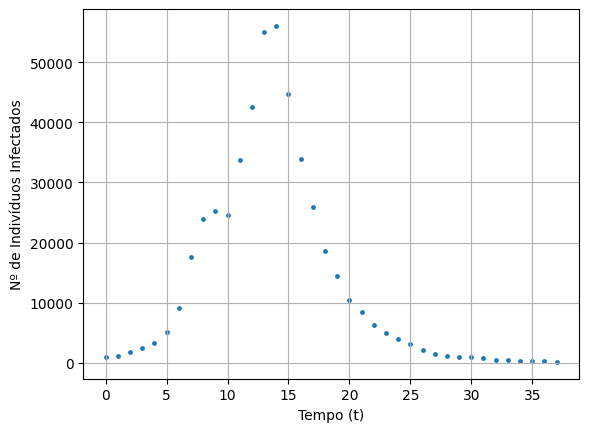

In [5]:
data_t = np.linspace(t_0, t_f, len(I_data))
plt.scatter(data_t, I_data, s=6)
plt.xlabel("Tempo (t)")
plt.ylabel("Nº de Indivíduos Infectados")
plt.grid()
plt.savefig(f"../../images/data-eua-2025.png")
plt.show()

In [6]:
model = WorkflowModel(t_0, t_f, I_data, data_t, N, 1/7, scaling="min/max")

[<deepxde.icbc.initial_conditions.IC object at 0x7fac251e82d0>, <deepxde.icbc.initial_conditions.IC object at 0x7fac26336490>, <deepxde.icbc.boundary_conditions.PointSetBC object at 0x7face528bed0>]
Compiling model...


'compile' took 0.008424 s



2025-12-13 22:04:25.318758: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1765674265.319478  803780 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2249 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


In [7]:
model.scaled_I_data

array([0.01386553, 0.01842774, 0.02841092, 0.04143557, 0.05666082,
       0.08805954, 0.1607686 , 0.31085626, 0.42505457, 0.44963681,
       0.43757827, 0.60099474, 0.75975954, 0.98221634, 1.        ,
       0.79758114, 0.60412567, 0.46196372, 0.32974917, 0.25453537,
       0.18452786, 0.147243  , 0.10979712, 0.08569793, 0.06807529,
       0.05463914, 0.03596093, 0.02356246, 0.01805203, 0.01497477,
       0.01325724, 0.01057359, 0.00660178, 0.00475901, 0.002791  ,
       0.00221848, 0.0019859 , 0.        ])

In [8]:
model.S0, model.I0, model.scaled_N

(np.float64(6082.926306938133),
 np.float64(0.013865531184026909),
 np.float64(6082.940172469317))

In [9]:
model.train()

Training model...



2025-12-13 22:04:27.259208: I external/local_xla/xla/service/service.cc:163] XLA service 0x564fa58889a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-13 22:04:27.259225: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-12-13 22:04:27.266665: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-13 22:04:27.317098: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002
I0000 00:00:1765674267.569429  803780 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Step      Train loss                                            Test loss                                             Test metric
0         [3.51e-04, 6.00e-03, 3.70e+07, 1.92e-04, 1.64e-01]    [1.89e-04, 6.05e-03, 3.70e+07, 1.92e-04, 1.64e-01]    []  
100       [1.62e-02, 4.29e-04, 3.67e+07, 2.27e-03, 6.03e-02]    [1.70e-02, 4.49e-04, 3.67e+07, 2.27e-03, 6.03e-02]    []  
200       [1.60e-02, 2.93e-04, 3.64e+07, 2.18e-03, 5.57e-02]    [1.68e-02, 3.06e-04, 3.64e+07, 2.18e-03, 5.57e-02]    []  
300       [1.74e-02, 5.80e-04, 3.62e+07, 1.66e-03, 4.78e-02]    [1.84e-02, 6.05e-04, 3.62e+07, 1.66e-03, 4.78e-02]    []  
400       [1.86e-02, 7.66e-04, 3.60e+07, 1.19e-03, 3.97e-02]    [1.98e-02, 8.01e-04, 3.60e+07, 1.19e-03, 3.97e-02]    []  
500       [1.81e-02, 1.08e-03, 3.58e+07, 5.60e-04, 3.10e-02]    [1.93e-02, 1.13e-03, 3.58e+07, 5.60e-04, 3.10e-02]    []  
600       [1.76e-02, 1.33e-03, 3.57e+07, 3.65e-04, 2.50e-02]    [1.86e-02, 1.39e-03, 3.57e+07, 3.65e-04, 2.50e-02]    []  
700      

(<deepxde.model.LossHistory at 0x7fac25257c10>,
 <deepxde.model.TrainState at 0x7fac2505c190>)

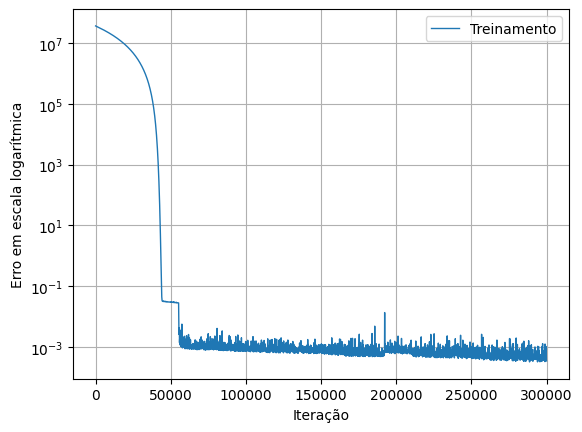

In [10]:
plotting.plot_losshistory(model.losshistory)

In [11]:
# plotting.plot_phys_losshistory(model.losshistory)

In [12]:
# plotting.plot_data_losshistory(model.losshistory)

In [13]:
pred = model.predict(data_t)

In [14]:
if model.data_weight_hist:
    plotting.plot_wdata(model.data_weight_hist)

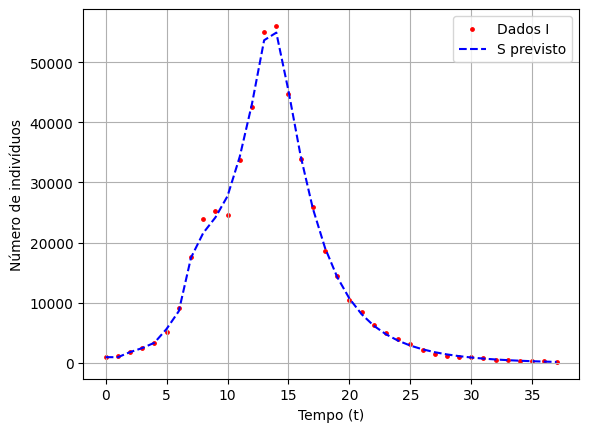

In [15]:
plotting.plot_incidence_results(I_data, pred[:,1:2], data_t)

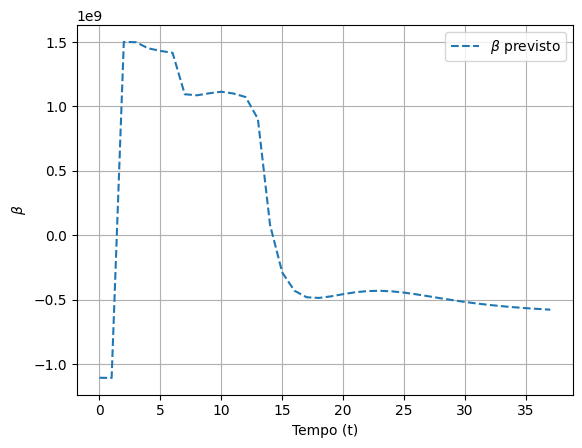

In [ ]:
plotting.plot_beta(model.scale(pred[:,2:3]), data_t)

In [29]:
model.scale(pred[:,2:3])

array([[-0.35601359],
       [-0.35634288],
       [ 0.47774734],
       [ 0.47703296],
       [ 0.46189903],
       [ 0.4555481 ],
       [ 0.45065498],
       [ 0.34784637],
       [ 0.34525616],
       [ 0.35019007],
       [ 0.35410328],
       [ 0.34960184],
       [ 0.34084148],
       [ 0.28674764],
       [ 0.02331034],
       [-0.09481248],
       [-0.13986124],
       [-0.15607511],
       [-0.15780982],
       [-0.15384385],
       [-0.14842818],
       [-0.14368787],
       [-0.14074536],
       [-0.14003492],
       [-0.14145939],
       [-0.14458164],
       [-0.14882769],
       [-0.15364495],
       [-0.15859013],
       [-0.16335557],
       [-0.16775752],
       [-0.17170867],
       [-0.17518883],
       [-0.1782202 ],
       [-0.18084901],
       [-0.18313287],
       [-0.18513245],
       [-0.18690636]])